In [8]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import ptitprince as pt

sns.set(style="whitegrid",font_scale=2)
plt.rcParams.update({'font.size': 30})
plt.rcParams["figure.figsize"] = (10, 7)

In [2]:
#move up in directory
os.chdir('../')

from helpers import dot2_

In [3]:
os.getcwd()

'C:\\Users\\Bio_Psych\\Desktop\\Deniz\\tf-cpu\\p1_generalization'

In [4]:
# Config 

### Human
PATH_HUMAN_DATA = 'data/human_raw_data/'
HUMAN_DATA_NAME = 'data_chakroun_wiehler.csv'

# number of human subjects
N_SUBS = 31
# number of trials (human & RNN)
N_TRIALS = 300

### RNN
PATH_RNN_DATA ='data/rnn_raw_data/'
RNN_FILE_NAME = 'lstm2_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}'

# number of RNN instances
N_IDS = 30
# number of random walk instances
N_WALKS = 3

In [5]:
# get human switch proportions
human_df = pd.read_csv(open(PATH_HUMAN_DATA + HUMAN_DATA_NAME, 'rb'), index_col=0)
human_switch_props = []

for sub in range(1,N_SUBS+1):
    
    sub_df = human_df.loc[human_df.vp == sub,:]
    choice = sub_df['choice'].to_numpy()
    is_switch = [int(choice[t] != choice[t-1]) for t in range(1, N_TRIALS) if choice[t] != 0]
    human_switch_props.append(np.mean(is_switch))

In [6]:
# get LSTM switch proportions
rnn_file_path = PATH_RNN_DATA + RNN_FILE_NAME

rnn_switch_props = []

for id_ in range(N_IDS):
        for walk in range(1,N_WALKS + 1):
            
            d = pickle.load(open(rnn_file_path.format(id_, walk), 'rb'))
            df = d.reset_index()
            rnn_switch_props.append(np.mean(df['is_switch']))

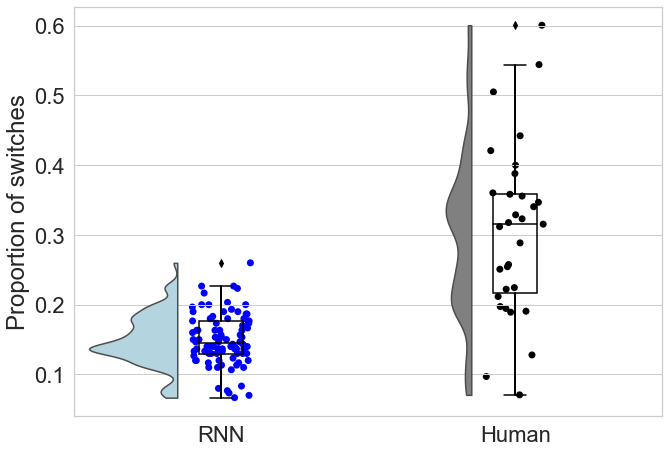

In [10]:
# plotting
plot_df = pd.DataFrame({"switch": rnn_switch_props + human_switch_props,
                       "type": ['RNN'] * len(rnn_switch_props)  + ['Human'] * len(human_switch_props)})

# plotting the clouds
f, ax = plt.subplots()
dy="switch"; dx="type"; ort="v"; pal = {"RNN": "lightblue", "Human": "grey"}#sns.color_palette(n_colors=2)
ax=pt.half_violinplot( x = dx, y = dy, data = plot_df, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = ort)


pal1 = {"RNN": "blue", "Human": "black"}
ax=sns.stripplot( x = dx, y = dy, data = plot_df, palette = pal1, edgecolor = "white",
size = 7, jitter = 1, zorder = 0, orient = ort)

x=sns.boxplot( x = dx, y = dy, data = plot_df, color = "black", width = .15, zorder = 10,\
showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
saturation = 1, orient = ort)

plt.ylabel('Proportion of switches')
plt.xlabel('')

plt.tight_layout()
plt.savefig('../p1_generalization/plots/figure_2_C_PUG23.png', dpi = 600)


In [30]:
plot_df.groupby("type").median()

,switch
type,
Human,0.315436
RNN,0.145000


In [12]:
# save data for jasp analysis

plot_df.to_csv('data/intermediate_data/jasp_analysis/switch_t_test_data.csv')